In [7]:
%config Completer.use_jedi = False

## MNIST Lightning Short Code

In [11]:
import torch
from pytorch_lightning import LightningModule, Trainer
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
PATH_DATASETS = ''
AVAIL_GPUS = min(1, torch.cuda.device_count())
BATCH_SIZE = 256 if AVAIL_GPUS else 64

C:\Users\Admin\Anaconda3\envs\pytorch\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
class MNISTModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(28 * 28, 10)
        
    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))
    
    def training_step(self, batch, batch_nb):
        x, y = batch
        loss = torch.nn.functional.cross_entropy(self(x), y)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)

In [12]:
train_ds = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.ToTensor())
mnist_model = MNISTModel()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE)
trainer = Trainer(gpus=AVAIL_GPUS, max_epochs=3)
trainer.fit(mnist_model, train_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Missing logger folder: D:\DanielTsai\Code\PyTorchBook\lightning_logs

  | Name | Type   | Params
--------------------------------
0 | l1   | Linear | 7.9 K 
--------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)
C:\Users\Admin\Anaconda3\envs\pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

## MNIST Full Code

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
PATH_DATASETS = ''
BATCH_SIZE = 1024
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
'cuda' if torch.cuda.is_available() else 'cpu'

c:\Users\Admin\Anaconda3\envs\pytorch\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [16]:
train_ds = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.ToTensor())
test_ds = MNIST(PATH_DATASETS, train=False, download=True, transform=transforms.ToTensor())
print(train_ds.data.shape, test_ds.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [18]:
train_ds.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [19]:
train_ds.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [21]:
number_img = train_ds.data[0].clone()
number_img[number_img>0] = 1
number_img = number_img.numpy()

text_image = []
for i in range(number_img.shape[0]):
    text_image.append(''.join(number_img[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

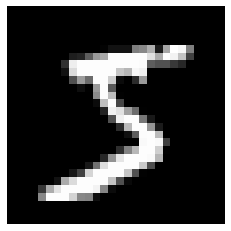

In [27]:
import matplotlib.pyplot as plt

X = train_ds.data[0]
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

### Features Transforms

In [3]:
train_ds = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))
test_ds = MNIST(PATH_DATASETS, train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))

In [4]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 256),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 10)
).to(device)

In [5]:
epochs = 5
lr = 0.1
train_loader = DataLoader(train_ds, batch_size=600)
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' + f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.322334
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.291210
Epoch 1: [12000 / 60000] (20 %)  Loss: 0.985873
Epoch 1: [18000 / 60000] (30 %)  Loss: 0.749984
Epoch 1: [24000 / 60000] (40 %)  Loss: 0.648254
Epoch 1: [30000 / 60000] (50 %)  Loss: 0.658251
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.525631
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.583296
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.397493
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.426410
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.400928
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.318818
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.435584
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.329897
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.382373
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.390600
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.361133
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.468570
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.300675
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.347504
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.33

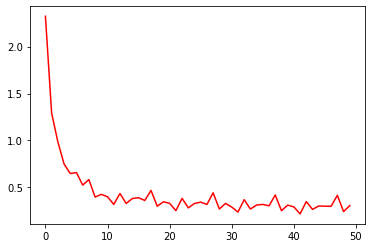

In [7]:
plt.plot(loss_list, 'r')

In [8]:
test_loader = DataLoader(test_ds, shuffle=False, batch_size=BATCH_SIZE)
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'avg loss: {test_loss:.4f}, acc: {correct} / {data_count}' + f' ({percentage:.0f}%)')

avg loss: 0.0003, acc: 9175 / 10000 (92%)


In [12]:
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device)
        output = torch.argmax(model(data), axis=-1)
        predictions.append(str(output.item()))

print('actual:    ', test_ds.targets[:20].numpy())
print('predictions:', ' '.join(predictions[:20]))

actual:     [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
predictions: 7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4


In [15]:
data = test_ds[8][0]
data = data.reshape(1, *data.shape).to(device)
predictions = torch.softmax(model(data), dim=1)
print(f'0~9 predictions percentage: {np.around(predictions.cpu().detach().numpy(), 2)}')
print(f'0~9 predictions percentage: {np.argmax(predictions.cpu().detach().numpy(), axis=-1)}')

0~9 predictions percentage: [[0.   0.   0.   0.   0.01 0.   0.99 0.   0.   0.  ]]
0~9 predictions percentage: [6]


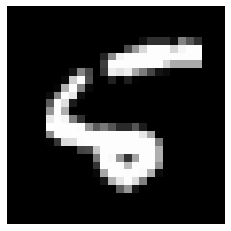

In [16]:
data = test_ds[8][0]
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [17]:
torch.save(model, 'MNIST-Model.pt')

### Blind Test

In [19]:
from skimage import io
from skimage.transform import resize
import numpy as np


for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 = image_resized.reshape(1, 28, 28)
    X1 = torch.FloatTensor(X1)
    predictions = torch.softmax(model(X1), dim=1)
    print(f'actual/predictions: {i} {np.argmax(predictions.detach().cpu().numpy())}')

actual/predictions: 0 8
actual/predictions: 1 8
actual/predictions: 2 8
actual/predictions: 3 8
actual/predictions: 4 8
actual/predictions: 5 8
actual/predictions: 6 8
actual/predictions: 7 8
actual/predictions: 8 8
actual/predictions: 9 8


In [20]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [22]:
from torchinfo import summary
summary(model, (60000, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Flatten: 1-1                           [60000, 784]              --
├─Linear: 1-2                            [60000, 256]              200,960
├─Dropout: 1-3                           [60000, 256]              --
├─Linear: 1-4                            [60000, 10]               2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
Total mult-adds (G): 12.21
Input size (MB): 188.16
Forward/backward pass size (MB): 127.68
Params size (MB): 0.81
Estimated Total Size (MB): 316.65

## Experiment

##### 1. Why model structure design is two fully connected layers? Dose the model accuracy will improve when we add more layers?

In [24]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 256),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 64),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(64, 10)
).to(device)

In [25]:
epochs = 5
lr = 0.1
train_loader = DataLoader(train_ds, batch_size=600)
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' + f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.336792
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.612970
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.203492
Epoch 1: [18000 / 60000] (30 %)  Loss: 0.882892
Epoch 1: [24000 / 60000] (40 %)  Loss: 0.727632
Epoch 1: [30000 / 60000] (50 %)  Loss: 0.722632
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.546740
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.619637
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.430619
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.457957
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.438710
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.329909
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.463334
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.360521
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.416299
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.411086
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.370072
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.498871
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.324057
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.381602
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.34

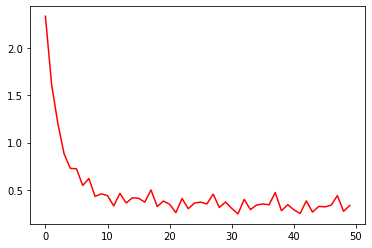

In [26]:
plt.plot(loss_list, 'r')

In [27]:
test_loader = DataLoader(test_ds, shuffle=False, batch_size=BATCH_SIZE)
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'avg loss: {test_loss:.4f}, acc: {correct} / {data_count}' + f' ({percentage:.0f}%)')

avg loss: 0.0003, acc: 9177 / 10000 (92%)


##### 3.Change Dropout Function to Activation Function ReLu, Accuracy?

In [28]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
).to(device)

In [29]:
epochs = 5
lr = 0.1
train_loader = DataLoader(train_ds, batch_size=600)
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' + f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.363424
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.444294
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.002894
Epoch 1: [18000 / 60000] (30 %)  Loss: 0.701815
Epoch 1: [24000 / 60000] (40 %)  Loss: 0.598961
Epoch 1: [30000 / 60000] (50 %)  Loss: 0.595637
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.464395
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.521710
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.352929
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.378737
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.354684
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.271718
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.388691
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.284977
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.329495
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.347355
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.307778
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.400782
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.258657
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.289153
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.27

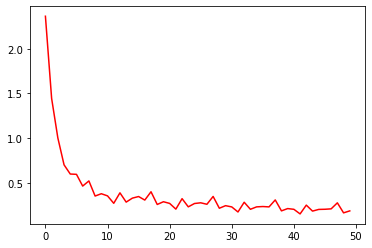

In [30]:
plt.plot(loss_list, 'r')

In [31]:
test_loader = DataLoader(test_ds, shuffle=False, batch_size=BATCH_SIZE)
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'avg loss: {test_loss:.4f}, acc: {correct} / {data_count}' + f' ({percentage:.0f}%)')

avg loss: 0.0002, acc: 9432 / 10000 (94%)


## Performance Object

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

In [2]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f'TP={tp}, FP={fp}, TN={tn}, FN={fn}')

TP=3, FP=1, TN=2, FN=2


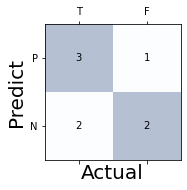

In [4]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow([[1, 0], [0, 1]], cmap=plt.cm.Blues, alpha=0.3)
ax.text(x=0, y=0, s=tp, va='center', ha='center')
ax.text(x=1, y=0, s=fp, va='center', ha='center')
ax.text(x=0, y=1, s=tn, va='center', ha='center')
ax.text(x=1, y=1, s=fn, va='center', ha='center')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predict', fontsize=20)
plt.xticks([0, 1], ['T', 'F'])
plt.yticks([0, 1], ['P', 'N'])
plt.show()

In [5]:
print(f'Accuracy:{accuracy_score(y_true, y_pred)}')
print(f'Check:{(tp + tn) / (tp + tn + fp + fn)}')

Accuracy:0.625
Check:0.625


In [6]:
print(f'Precision:{precision_score(y_true, y_pred)}')
print(f'Check:{(tp) / (tp + fp)}')

Precision:0.75
Check:0.75


In [7]:
print(f'Recall:{recall_score(y_true, y_pred)}')
print(f'Check:{(tp) / (tp + fn)}')

Recall:0.6
Check:0.6


In [8]:
import pandas as pd

df = pd.read_csv('./data/auc_data.csv')
df

c:\Users\Admin\Anaconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(f'FPR={fpr}\n\nTPR={tpr}\n\nThreshold={threshold}')

FPR=[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]

TPR=[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]

Threshold=[1.99 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


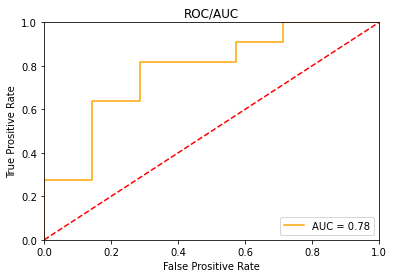

In [10]:
auc1 = auc(fpr, tpr)
plt.title('ROC/AUC')
plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Prositive Rate')
plt.xlabel('False Prositive Rate')
plt.show()

## Hyperparameter Tuning

In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from ray import tune
from ray.tune.schedulers import ASHAScheduler

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

c:\Users\Admin\Anaconda3\envs\pytorch\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [3]:
class ConvNet(torch.nn.Module):
    def __init__(self) -> None:
        super(ConvNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 3, kernel_size=3)
        self.fc = torch.nn.Linear(192, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 3))
        x = x.view(-1, 192)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

In [ ]:
EPOCH_SIZE = 5


def train(model, optimizer, train_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

def test(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx